In [17]:
import tensorflow as tf 
from tensorflow import keras 
from tensorflow.keras import layers
from tensorflow.keras.utils import to_categorical
%reload_ext autoreload

In [18]:
%autoreload 2
from my_utils.score import test_func , conf_matrix
from my_utils.print_lines import *

In [16]:
import numpy as np 
import pandas as pd 
from matplotlib import pyplot as plt 
import seaborn as sns

,index,livetime,significance,likelihood,var_inter_sigma,var_inter_prob,var_inter_index,var_max,var_min,var_mean,...,flux_brems_lolim,flux_brems_hilim,brems_kt_hilim,brems_kt_lolim,brems_nh_hilim,brems_nh_lolim,bb_kt_hilim,bb_kt_lolim,bb_nh_hilim,bb_nh_lolim
count,1100.000000,1100.000000,1100.000000,1100.000000,1.095000e+03,1095.000000,1095.000000,546.000000,546.000000,546.000000,...,142.000000,142.000000,1.240000e+02,142.000000,142.000000,136.000000,142.000000,142.000000,142.000000,114.000000
mean,22.041818,50940.248364,47.953209,32843.961425,1.012944e-04,0.770570,4.911416,0.871517,0.007131,0.010304,...,12.906908,12.705068,8.396005e+05,4.731831,982.101089,754.218486,2.137308,0.913699,749.999731,627.709211
std,22.213786,47492.166901,81.006175,112967.932302,1.430027e-04,0.223751,1.966590,20.079430,0.023738,0.061340,...,0.841372,0.733658,9.348448e+06,9.576549,810.726794,576.530659,10.319842,0.433529,643.352664,400.918749
min,0.000000,4256.000000,1.840000,11.367330,6.731750e-08,0.221500,0.000000,0.000084,0.000024,0.000057,...,10.999566,10.982967,1.425000e+00,1.008000,0.648700,0.083260,0.402400,0.360300,0.100100,10.730000
25%,3.000000,17980.825000,9.200000,103.916100,5.171680e-07,0.604000,3.400000,0.000444,0.000243,0.000267,...,12.496114,12.406270,2.655500e+00,1.730000,66.050000,58.615000,0.812675,0.693575,26.907500,393.550000
50%,10.000000,37958.300000,17.390000,251.705800,5.134500e-05,0.807400,5.000000,0.002233,0.001183,0.001257,...,13.083125,12.871781,4.668500e+00,2.728000,1071.000000,762.000000,0.892800,0.811000,791.300000,597.000000
75%,40.000000,69249.500000,44.060000,4017.937000,8.803350e-05,0.998500,7.000000,0.005484,0.004266,0.004745,...,13.433798,13.052468,1.016500e+01,4.646000,1560.750000,1348.250000,1.502000,1.033500,1224.750000,1029.250000
max,73.000000,184208.000000,337.000000,462011.400000,4.811690e-04,1.000000,8.000000,469.200000,0.230371,1.325500,...,14.608183,14.233364,1.041000e+08,81.320000,3373.000000,1920.000000,123.800000,3.754000,2830.000000,1481.000000


,index,livetime,significance,likelihood,var_inter_sigma,var_inter_prob,var_inter_index,var_max,var_min,var_mean,...,flux_brems_lolim,flux_brems_hilim,brems_kt_hilim,brems_kt_lolim,brems_nh_hilim,brems_nh_lolim,bb_kt_hilim,bb_kt_lolim,bb_nh_hilim,bb_nh_lolim
count,1268.000000,1268.000000,1268.000000,1.268000e+03,1.235000e+03,1235.000000,1235.000000,1028.000000,1028.000000,1028.000000,...,657.000000,657.000000,319.000000,657.000000,653.000000,596.000000,657.000000,657.000000,657.000000,274.000000
mean,21.215300,20853.597003,83.881743,inf,7.395187e-04,0.855801,6.468637,27.822399,0.051117,0.358502,...,12.139128,12.069728,356.270855,33.044725,296.014043,259.522077,2.774100,1.077449,185.580538,328.543648
std,29.084807,23101.444868,117.400880,inf,1.908386e-03,0.168945,1.687557,465.766260,0.154987,6.091575,...,0.664334,0.625338,5393.592765,30.757195,660.429729,560.822326,19.176036,0.859778,496.567227,509.319533
min,0.000000,916.000000,1.000000,9.494117e+00,1.910500e-08,0.085000,0.000000,0.000150,0.000068,0.000105,...,9.791021,9.788346,0.197500,0.173200,0.035380,0.083460,0.159500,0.121100,0.007671,0.000000
25%,2.000000,7462.700000,17.270000,1.117242e+03,4.102500e-05,0.800000,6.400000,0.005506,0.003110,0.003948,...,11.672437,11.602408,1.302000,4.405000,43.780000,31.437500,0.791200,0.759100,1.182000,48.527500
50%,9.000000,9636.400000,44.360000,1.542845e+04,1.436754e-04,0.870250,6.400000,0.018155,0.013687,0.015543,...,12.269945,12.209363,5.539000,19.300000,67.400000,51.295000,1.262000,1.112000,3.586000,105.900000
75%,30.000000,26801.300000,90.710000,3.953709e+04,2.423574e-04,1.000000,8.000000,0.056987,0.042755,0.050996,...,12.499078,12.428058,21.180000,60.930000,213.400000,192.200000,1.448000,1.247000,118.600000,218.475000
max,150.000000,173023.700000,519.420000,1.797693e+308,8.676740e-03,1.000000,8.000000,10250.004202,2.448138,137.204179,...,14.538201,13.800519,96120.000000,99.720000,4861.000000,4430.000000,327.500000,13.540000,3227.000000,2502.000000


,index,livetime,significance,likelihood,var_inter_sigma,var_inter_prob,var_inter_index,var_max,var_min,var_mean,...,flux_brems_lolim,flux_brems_hilim,brems_kt_hilim,brems_kt_lolim,brems_nh_hilim,brems_nh_lolim,bb_kt_hilim,bb_kt_lolim,bb_nh_hilim,bb_nh_lolim
count,95.000000,95.000000,95.000000,95.000000,6.400000e+01,64.000000,64.000000,91.000000,91.000000,91.000000,...,40.000000,40.000000,32.000000,40.000000,40.000000,21.000000,40.000000,40.000000,40.000000,13.000000
mean,3.800000,38167.429474,34.787368,13917.093891,1.569417e-05,0.549704,3.207812,10.811307,0.008486,0.027849,...,12.745523,12.679084,172.910084,15.949073,65.215895,94.668162,1.084760,0.857302,18.581310,25.214215
std,6.295219,34566.563684,43.706247,22823.233977,2.432501e-05,0.237813,1.819018,103.045688,0.014996,0.183337,...,0.599896,0.555087,809.731605,25.729744,103.320202,91.493272,1.148652,0.680336,37.163859,28.506009
min,0.000000,3903.900000,1.840000,23.550950,3.031800e-07,0.099000,0.000000,0.000150,0.000068,0.000105,...,11.726999,11.693146,0.522700,0.409700,0.733300,0.296400,0.185600,0.163100,0.104400,0.242800
25%,0.000000,10162.000000,5.690000,390.680900,4.354550e-07,0.435812,2.062500,0.001266,0.000715,0.000823,...,12.286735,12.255141,5.523500,4.222000,2.864000,35.960000,0.588850,0.525050,0.361625,4.938000
50%,1.000000,24735.600000,12.860000,767.561600,1.856350e-06,0.594000,3.200000,0.003089,0.001824,0.002029,...,12.535139,12.505852,6.167500,5.092500,18.955000,71.940000,0.634600,0.582650,1.045500,11.790000
75%,4.000000,49106.450000,34.310000,7690.349500,1.984400e-05,0.782800,5.000000,0.012217,0.011797,0.012088,...,13.355166,13.203847,7.161000,6.587500,98.405000,145.400000,0.866600,0.817975,17.155000,40.620000
max,24.000000,166935.300000,144.290000,62909.280000,8.061540e-05,0.900000,6.200000,983.002387,0.073643,1.751740,...,13.901702,13.773916,4544.000000,93.450000,519.700000,379.300000,5.770000,3.038000,182.100000,87.780000


,index,livetime,significance,likelihood,var_inter_sigma,var_inter_prob,var_inter_index,var_max,var_min,var_mean,...,flux_brems_lolim,flux_brems_hilim,brems_kt_hilim,brems_kt_lolim,brems_nh_hilim,brems_nh_lolim,bb_kt_hilim,bb_kt_lolim,bb_nh_hilim,bb_nh_lolim
count,3247.000000,3247.000000,3247.000000,3247.000000,3.017000e+03,3017.000000,3017.000000,1735.000000,1735.000000,1735.000000,...,320.000000,320.000000,283.000000,320.000000,320.000000,198.000000,320.000000,320.000000,320.000000,6.000000
mean,17.331383,21302.924761,31.112630,14149.962000,2.613537e-05,0.571115,3.751834,0.012226,0.007358,0.008634,...,12.825837,12.733272,53.466297,9.764207,33.908011,29.149581,0.731138,0.600654,5.716511,45.159667
std,24.076917,25577.899388,41.296728,39026.045693,4.764852e-05,0.339671,2.695115,0.044242,0.034723,0.038630,...,0.717740,0.682586,437.423216,18.780479,88.540732,68.978563,0.515113,0.345802,28.672788,100.009318
min,0.000000,845.100000,1.110000,13.080590,8.412000e-08,0.000000,0.000000,0.000050,0.000033,0.000033,...,10.673664,10.668775,0.087750,0.086150,0.036860,0.000000,0.121600,0.114900,0.013070,1.148000
25%,3.000000,3968.300000,6.670000,143.930000,5.293400e-07,0.278000,1.500000,0.000921,0.000438,0.000520,...,12.364717,12.294393,3.896000,2.789000,3.113750,4.584500,0.452325,0.355075,0.353400,2.089000
50%,7.000000,5307.000000,13.730000,756.138500,2.329200e-06,0.582400,3.750000,0.002813,0.001411,0.001767,...,12.670602,12.571550,9.063000,4.681500,11.085000,8.113500,0.680950,0.590750,1.065000,5.152500
75%,18.000000,39784.900000,33.440000,4533.021000,2.140200e-05,0.886400,6.400000,0.009596,0.005321,0.006876,...,13.417181,13.340187,16.075000,7.964000,22.577500,14.262500,0.794250,0.707875,2.190000,8.216000
max,107.000000,147712.000000,198.400000,211455.100000,2.510300e-04,1.000000,8.000000,0.747000,0.637867,0.712467,...,15.045131,14.072065,6398.000000,98.330000,541.100000,447.400000,3.331000,2.229000,263.500000,249.200000


,index,livetime,significance,likelihood,var_inter_sigma,var_inter_prob,var_inter_index,var_max,var_min,var_mean,...,flux_brems_lolim,flux_brems_hilim,brems_kt_hilim,brems_kt_lolim,brems_nh_hilim,brems_nh_lolim,bb_kt_hilim,bb_kt_lolim,bb_nh_hilim,bb_nh_lolim
count,2082.000000,2082.000000,2082.000000,2.082000e+03,2.063000e+03,2063.000000,2063.000000,1794.000000,1794.000000,1794.000000,...,775.000000,775.000000,4.840000e+02,775.000000,771.000000,613.000000,775.000000,775.000000,775.000000,202.000000
mean,33.489914,19481.549135,75.536585,inf,2.151422e-04,0.848865,6.332978,1.960064,0.011584,0.026753,...,12.627124,12.520488,2.151447e+05,23.663120,241.430624,205.089739,1.273686,0.825628,160.571914,366.234906
std,31.781679,25423.739657,71.743120,inf,9.188633e-04,0.211210,1.639863,68.500892,0.015814,0.537237,...,0.549099,0.481786,4.731815e+06,29.008495,569.698403,413.011646,4.844584,0.438135,442.690501,396.290644
min,0.000000,845.100000,25.120000,1.387479e+01,4.354550e-07,0.056250,0.000000,0.000225,0.000117,0.000146,...,11.472370,11.449283,8.775000e-02,0.086150,0.035380,0.000000,0.121600,0.114900,0.044660,0.250000
25%,7.000000,4102.300000,32.600000,4.392422e+03,1.526825e-05,0.800000,5.800000,0.003930,0.002116,0.002704,...,12.289040,12.222754,1.640000e+00,2.594500,10.260000,12.370000,0.602750,0.507900,0.712850,41.900000
50%,23.000000,7462.700000,54.890000,1.493802e+04,8.153200e-05,0.847800,6.400000,0.009411,0.005505,0.007090,...,12.497163,12.434034,5.953000e+00,5.916000,42.960000,36.770000,0.864900,0.752700,2.069000,127.900000
75%,55.000000,27775.000000,83.080000,3.739946e+04,1.223606e-04,1.000000,7.600000,0.021729,0.015097,0.016705,...,12.934794,12.793715,1.379000e+01,49.270000,83.490000,84.640000,1.354000,1.141000,20.040000,612.500000
max,150.000000,184208.000000,519.420000,1.797693e+308,8.676740e-03,1.000000,8.000000,2860.018458,0.203490,22.717583,...,15.045131,14.072065,1.041000e+08,95.630000,3648.000000,2417.000000,123.800000,3.754000,3039.000000,1907.000000


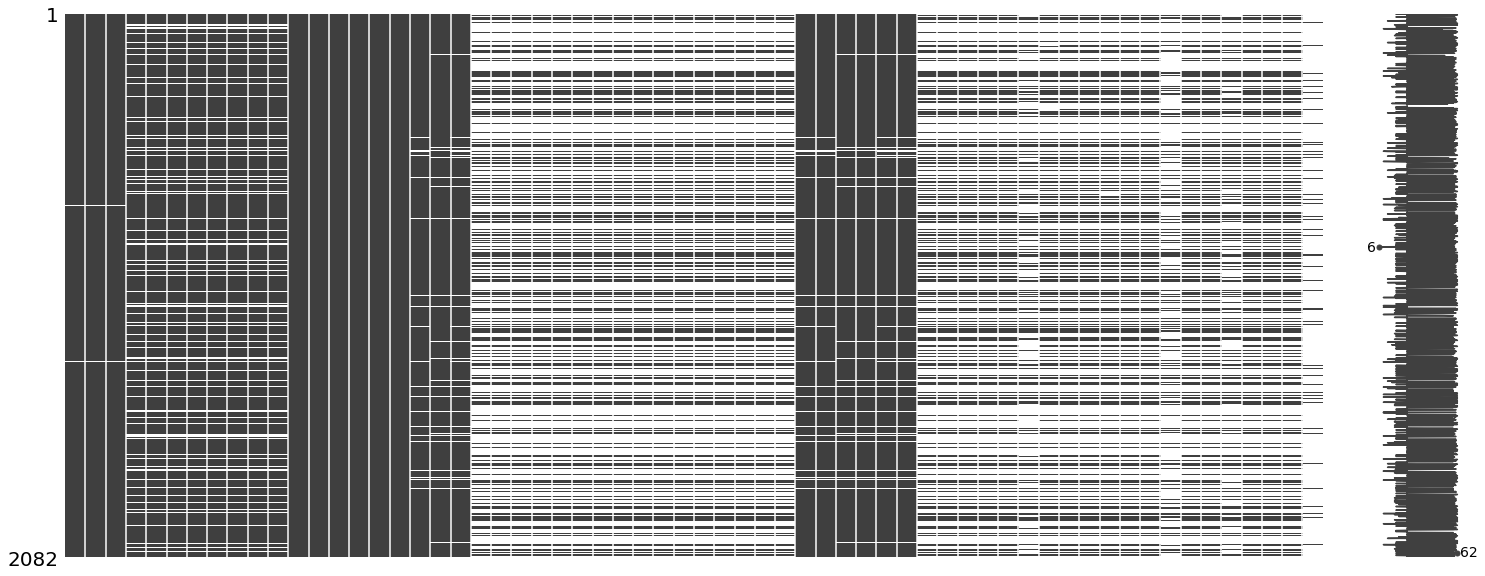

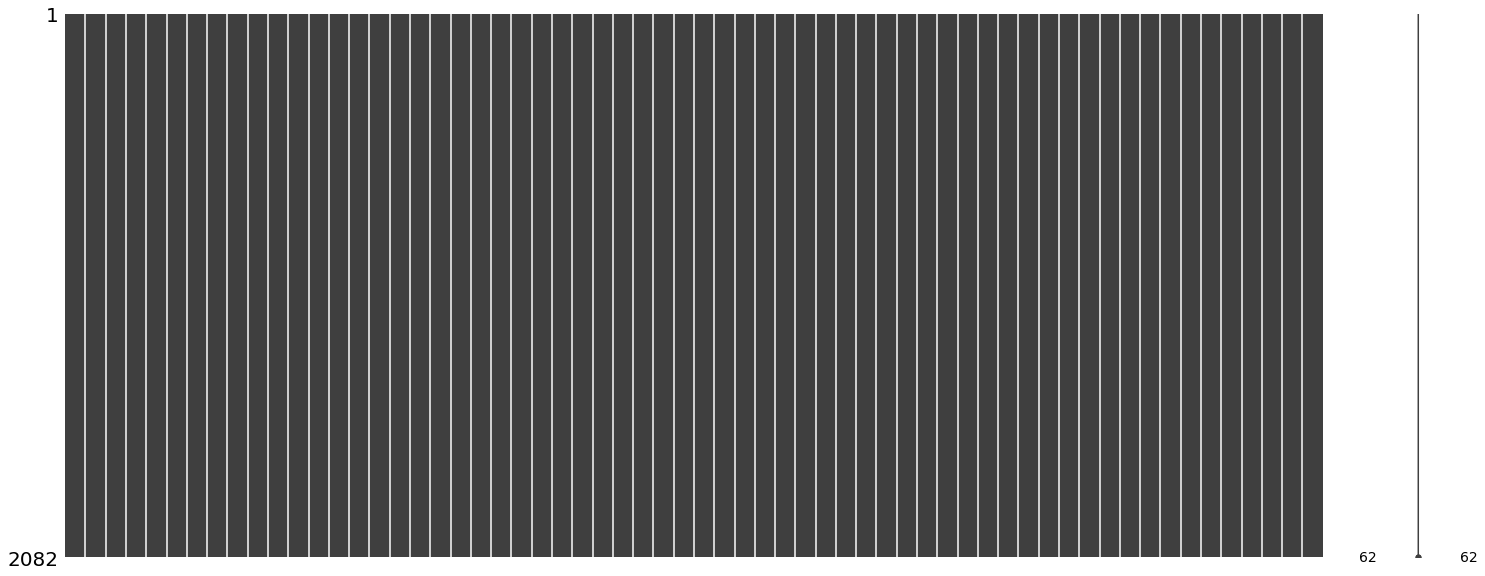

In [6]:
data_bh = pd.read_csv('processed_data/BH.csv')
data_bh = data_bh.sample(frac=1)
#display(data_bh)
display(data_bh.describe())
data_ns = pd.read_csv('processed_data/NS.csv')
data_ns = data_ns.sample(frac=1)

display(data_ns.describe())


data_pulsar = pd.read_csv('processed_data/PULSAR.csv')
data_pulsar =  data_pulsar.sample(frac=1)
display(data_pulsar.describe())

data_cv = pd.read_csv('processed_data/CV.csv')
data_cv = data_cv.sample(frac=0.9)
display(data_cv.describe())

data = pd.concat([data_bh , data_ns , data_cv ] , axis=0)
#display(data)
data =  data.sample(frac=1)
max_flux = 12
min_flux = 22
data = data[data['flux_aper']>max_flux]
data = data[data['flux_aper']<min_flux]
data = data[data['flux_aper_lolim']<(min_flux-2)]
data = data[data['significance']>25]
data = data.sample(frac=1)
#data = data[data['flux_aper_hilim']>(max_flux-1)]
display(data.describe())
data_class = data[['class']]
data_val = data.drop(columns=['index' , 'livetime' , 'gti_obs' , 'significance' , 'likelihood' , 'class'])
#display(data_val)
import missingno as msno
msno.matrix(data_val)
plt.show()
'''
rows = []
for d in data_val:
    rows.append(d)
print(rows)


from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
for r in rows:
    try:
        data_val[[r]] = imputer.fit_transform(data_val[[r]])
    except:
        print(r)
'''
data_val = data_val.replace(np.nan , 0)

for d in data_val:
    mean = np.mean(data_val[d])
    var = np.var(data_val[d])
    data_val[d] = (data_val[d]-mean)/var
    data_val[d] = data_val[d] / np.amax(data_val[d])
msno.matrix(data_val)
plt.show()

In [7]:
data_bh_clean = data[data_class['class']=='BH']
display(data_bh_clean.describe())
data_ns_clean = data[data_class['class']=='NS']
display(data_ns_clean.describe())
data_cv_clean = data[data_class['class']=='CV']
display(data_cv_clean.describe())

,index,livetime,significance,likelihood,var_inter_sigma,var_inter_prob,var_inter_index,var_max,var_min,var_mean,...,flux_brems_lolim,flux_brems_hilim,brems_kt_hilim,brems_kt_lolim,brems_nh_hilim,brems_nh_lolim,bb_kt_hilim,bb_kt_lolim,bb_nh_hilim,bb_nh_lolim
count,384.000000,384.000000,384.000000,384.000000,3.840000e+02,384.000000,384.000000,253.000000,253.000000,253.000000,...,100.000000,100.000000,8.200000e+01,100.00000,100.000000,97.00000,100.000000,100.000000,100.000000,89.000000
mean,29.695312,35866.423958,92.588958,62798.402372,1.485297e-04,0.797876,5.787674,1.870719,0.005727,0.012496,...,13.076298,12.815933,1.269633e+06,5.50751,1104.030897,778.46957,2.718352,1.012950,840.345289,570.428764
std,22.615145,34354.075607,94.670357,147688.555988,1.611576e-04,0.165038,1.834362,29.497377,0.007700,0.083480,...,0.624102,0.491404,1.149591e+07,11.25297,801.640046,503.89045,12.268638,0.473698,638.571660,344.586530
min,0.000000,4256.000000,26.510000,71.681870,5.324400e-07,0.358200,1.000000,0.000278,0.000191,0.000194,...,11.807990,11.766243,1.425000e+00,1.00800,0.648700,0.08326,0.402400,0.360300,0.100100,10.730000
25%,8.000000,13668.100000,30.640000,2424.373000,3.053866e-05,0.666667,4.333333,0.003360,0.002491,0.002830,...,12.791860,12.583505,3.597000e+00,1.92175,557.125000,488.70000,0.864900,0.722200,361.775000,396.100000
50%,27.000000,27775.000000,74.200000,8352.518000,8.803350e-05,0.811600,5.800000,0.004973,0.004038,0.004467,...,13.079164,12.867580,5.985500e+00,3.05550,1104.500000,807.60000,1.208000,0.910350,815.400000,544.600000
75%,49.250000,45360.100000,107.910000,21810.190000,3.199860e-04,1.000000,7.000000,0.009826,0.005430,0.007256,...,13.380064,13.017720,1.220750e+01,5.11100,1620.250000,1229.00000,1.688250,1.173750,1256.750000,787.500000
max,73.000000,184208.000000,337.000000,462011.400000,4.811690e-04,1.000000,8.000000,469.200000,0.057274,1.325500,...,14.608183,14.043543,1.041000e+08,81.32000,3373.000000,1920.00000,123.800000,3.754000,2830.000000,1481.000000


,index,livetime,significance,likelihood,var_inter_sigma,var_inter_prob,var_inter_index,var_max,var_min,var_mean,...,flux_brems_lolim,flux_brems_hilim,brems_kt_hilim,brems_kt_lolim,brems_nh_hilim,brems_nh_lolim,bb_kt_hilim,bb_kt_lolim,bb_nh_hilim,bb_nh_lolim
count,657.000000,657.000000,657.000000,6.570000e+02,6.480000e+02,648.000000,648.000000,610.000000,610.000000,610.000000,...,424.000000,424.000000,156.000000,424.000000,420.000000,374.000000,424.000000,424.000000,424.000000,108.000000
mean,28.554033,20421.545205,74.333044,inf,5.067829e-04,0.859489,6.615535,4.965727,0.018855,0.058572,...,12.425373,12.345822,35.301321,38.444139,172.753028,131.023238,1.329452,0.966361,94.129510,214.717898
std,35.398738,23649.375013,84.993639,inf,1.594725e-03,0.129653,1.232072,115.932174,0.020787,0.919305,...,0.407081,0.360463,169.521037,31.537384,480.482385,329.851115,2.630691,0.433479,366.822573,365.217612
min,0.000000,1165.800000,25.120000,1.387479e+01,4.354550e-07,0.099000,0.000000,0.000225,0.000142,0.000146,...,11.472370,11.449283,0.197500,0.173200,0.035380,0.083460,0.159500,0.121100,0.053330,0.250000
25%,4.000000,7560.600000,29.880000,5.521818e+03,6.874200e-05,0.800000,6.400000,0.008304,0.005151,0.006219,...,12.193854,12.131650,0.960400,4.631000,38.590000,26.415000,0.634400,0.578500,0.975800,26.515000
50%,13.000000,8372.000000,54.890000,1.891644e+04,1.436754e-04,0.834000,6.400000,0.016925,0.013372,0.014738,...,12.396369,12.316368,2.155000,42.995000,57.435000,42.770000,1.256500,1.084500,2.506000,89.540000
75%,41.000000,24512.800000,64.570000,4.151773e+04,1.675000e-04,1.000000,7.800000,0.029838,0.020677,0.024739,...,12.537196,12.485156,6.549500,67.070000,87.650000,70.122500,1.424750,1.236000,19.070000,122.050000
max,150.000000,173023.700000,519.420000,1.797693e+308,8.676740e-03,1.000000,8.000000,2860.018458,0.203490,22.717583,...,14.538201,13.666150,1783.000000,95.630000,3648.000000,2417.000000,48.290000,3.668000,3039.000000,1907.000000


,index,livetime,significance,likelihood,var_inter_sigma,var_inter_prob,var_inter_index,var_max,var_min,var_mean,...,flux_brems_lolim,flux_brems_hilim,brems_kt_hilim,brems_kt_lolim,brems_nh_hilim,brems_nh_lolim,bb_kt_hilim,bb_kt_lolim,bb_nh_hilim,bb_nh_lolim
count,1041.000000,1041.000000,1041.000000,1041.000000,1031.000000,1031.000000,1031.000000,931.000000,931.000000,931.000000,...,251.000000,251.000000,246.000000,251.000000,251.000000,142.000000,251.000000,251.000000,251.000000,5.000000
mean,38.004803,12844.306724,70.005956,39244.865741,0.000057,0.861179,6.358487,0.015006,0.008412,0.009780,...,12.788977,12.697834,59.229463,5.927696,12.683863,8.491344,0.603919,0.513265,1.983235,4.351600
std,31.642732,19030.469843,47.989281,58624.589281,0.000053,0.259666,1.736961,0.024287,0.011359,0.011808,...,0.568158,0.533788,468.865068,7.351775,11.670594,6.432941,0.239496,0.204785,3.386691,3.548554
min,0.000000,845.100000,25.120000,1413.362000,0.000002,0.056250,1.500000,0.000248,0.000117,0.000184,...,11.807711,11.753501,0.087750,0.086150,0.036860,0.000000,0.121600,0.114900,0.044660,1.148000
25%,8.000000,3961.800000,33.190000,3870.743000,0.000008,0.832600,5.900000,0.003160,0.001610,0.002133,...,12.377269,12.296322,4.209000,2.590000,2.090000,3.842000,0.363500,0.309350,0.336900,2.089000
50%,31.000000,4102.300000,53.280000,14938.020000,0.000047,0.999500,6.500000,0.007403,0.003438,0.005063,...,12.617083,12.520137,9.112000,4.553000,10.240000,7.310500,0.660500,0.563500,1.017000,2.089000
75%,65.000000,5307.000000,83.080000,37399.460000,0.000102,1.000000,7.600000,0.018407,0.009391,0.012355,...,13.276835,13.188833,15.832500,7.189000,19.425000,11.577500,0.770900,0.682650,1.891500,8.216000
max,107.000000,147712.000000,195.010000,211455.100000,0.000251,1.000000,8.000000,0.439406,0.105682,0.105872,...,15.045131,14.072065,6398.000000,68.990000,63.210000,33.590000,1.275000,0.919300,19.540000,8.216000


In [39]:
def split_data(x,y,frac):
    split_no = int(len(y)*frac )
    x_train = x[:split_no]
    x_test = x[split_no:]
    y_train = y[:split_no]
    y_test = y[split_no:]
    return (x_train , y_train) , (x_test , y_test)

x = data_val.to_numpy()
y = data_class.to_numpy()
(x_train , y_train) , (x_test , y_test) =  split_data(x, y, 0.8)
print(x_train.shape , y_train.shape)
print(x_test.shape , y_test.shape)
np.savetxt('test_data/CNN_XRB.csv' , x_test , fmt='%f')
np.savetxt('test_data/CNN_XRB_label.csv' , y_test , fmt='%s')

(1665, 62) (1665, 1)
(417, 62) (417, 1)


# Neural Network

In [22]:
def class_to_int(label , cl):
    temp = []
    for i in range(len(label)):
        #print(label[i])
        #for j in range(len(cl)):
        if(label[i]=='BH' or label[i]=='NS'):
            temp.append(0)
        else:
            temp.append(1) 
    return temp
classes = ['BH' ,'NS' , 'CV']
y_train_int = class_to_int(y_train, classes)
y_test_int = class_to_int(y_test, classes)
one_hot_y_train =  to_categorical(y_train_int)
one_hot_y_test =  to_categorical(y_test_int)
for y_i , y_j in zip(y_train , one_hot_y_train):
    print(y_i , y_j)

['CV'] [0. 1.]
['BH'] [1. 0.]
['CV'] [0. 1.]
['CV'] [0. 1.]
['BH'] [1. 0.]
['CV'] [0. 1.]
['CV'] [0. 1.]
['NS'] [1. 0.]
['CV'] [0. 1.]
['CV'] [0. 1.]
['NS'] [1. 0.]
['CV'] [0. 1.]
['BH'] [1. 0.]
['CV'] [0. 1.]
['CV'] [0. 1.]
['NS'] [1. 0.]
['NS'] [1. 0.]
['CV'] [0. 1.]
['NS'] [1. 0.]
['CV'] [0. 1.]
['CV'] [0. 1.]
['CV'] [0. 1.]
['CV'] [0. 1.]
['CV'] [0. 1.]
['NS'] [1. 0.]
['NS'] [1. 0.]
['CV'] [0. 1.]
['BH'] [1. 0.]
['CV'] [0. 1.]
['NS'] [1. 0.]
['CV'] [0. 1.]
['NS'] [1. 0.]
['CV'] [0. 1.]
['CV'] [0. 1.]
['NS'] [1. 0.]
['CV'] [0. 1.]
['NS'] [1. 0.]
['BH'] [1. 0.]
['NS'] [1. 0.]
['CV'] [0. 1.]
['CV'] [0. 1.]
['CV'] [0. 1.]
['NS'] [1. 0.]
['BH'] [1. 0.]
['BH'] [1. 0.]
['CV'] [0. 1.]
['CV'] [0. 1.]
['CV'] [0. 1.]
['CV'] [0. 1.]
['CV'] [0. 1.]
['CV'] [0. 1.]
['CV'] [0. 1.]
['NS'] [1. 0.]
['BH'] [1. 0.]
['CV'] [0. 1.]
['CV'] [0. 1.]
['CV'] [0. 1.]
['BH'] [1. 0.]
['CV'] [0. 1.]
['CV'] [0. 1.]
['CV'] [0. 1.]
['NS'] [1. 0.]
['CV'] [0. 1.]
['CV'] [0. 1.]
['CV'] [0. 1.]
['CV'] [0. 1.]
['NS'] [1.

In [12]:
#from tensorflow.keras.layers import Flatten
#from tensorflow.keras.layers.convolutional import Conv2D
#from tensorflow.keras.layers.pooling import MaxPooling2D
visible = layers.Input(shape=(62,1))
#x = layers.BatchNormalization(axis=-1)(visible)
x = layers.Conv1D(60, kernel_size=4, activation='relu')(visible)
x = layers.MaxPool1D(pool_size=(2))(x)

x = layers.Conv1D(32, kernel_size=4, activation='relu')(x)
x = layers.MaxPool1D(pool_size=(2))(x)
x = layers.Conv1D(16, kernel_size=4, activation='relu')(x)
x = layers.MaxPooling1D(pool_size=(2))(x)
#x = layers.Conv1D(32, kernel_size=4, activation='relu')(x)
x = layers.MaxPooling1D(pool_size=(2))(x)
x = layers.Flatten()(x)
x = layers.Dense(16, activation='relu')(x)
#x = layers.Dense(10, activation='relu')(x)
output = layers.Dense(2, activation='sigmoid')(x)
model_cnn = keras.Model(inputs=visible, outputs=output)
# summarize layers
#print(model_cnn.summary())
model_cnn.compile(
        loss = "categorical_crossentropy",
        optimizer = keras.optimizers.Adam(learning_rate=0.0005),
        metrics = ["accuracy"],
    )
history = model_cnn.fit(x_train, one_hot_y_train, batch_size=128, epochs=100, validation_split=0.2)

Epoch 1/100
11/11 [==============================] - 3s 154ms/step - loss: 0.6747 - accuracy: 0.7019 - val_loss: 0.6390 - val_accuracy: 0.7417
Epoch 2/100
11/11 [==============================] - 0s 40ms/step - loss: 0.6228 - accuracy: 0.7748 - val_loss: 0.5939 - val_accuracy: 0.7568
Epoch 3/100
11/11 [==============================] - 0s 43ms/step - loss: 0.5679 - accuracy: 0.7967 - val_loss: 0.5458 - val_accuracy: 0.7538
Epoch 4/100
11/11 [==============================] - 1s 67ms/step - loss: 0.5160 - accuracy: 0.8019 - val_loss: 0.5019 - val_accuracy: 0.7658
Epoch 5/100
11/11 [==============================] - 0s 37ms/step - loss: 0.4484 - accuracy: 0.8181 - val_loss: 0.4621 - val_accuracy: 0.7718
Epoch 6/100
11/11 [==============================] - 1s 55ms/step - loss: 0.4134 - accuracy: 0.7944 - val_loss: 0.4307 - val_accuracy: 0.7718
Epoch 7/100
11/11 [==============================] - 0s 38ms/step - loss: 0.3704 - accuracy: 0.8049 - val_loss: 0.4081 - val_accuracy: 0.7958
Epoch

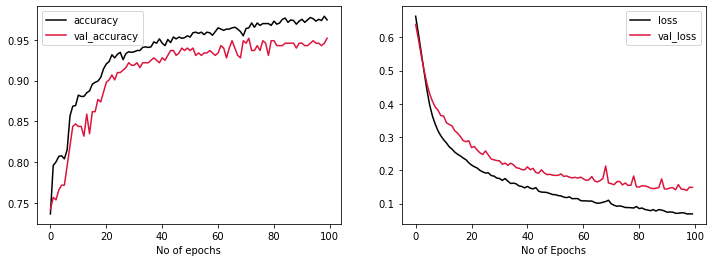

In [27]:
hist = history.history
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.plot(hist['accuracy'] , label = 'accuracy' , color='k')
plt.plot(hist['val_accuracy'] , label = 'val_accuracy' , color='crimson')
plt.xlabel('No of epochs')
plt.legend()
plt.subplot(1,2,2)
plt.plot(hist['loss'] , label = 'loss' , color='k')
plt.plot(hist['val_loss'] , label='val_loss' , color='crimson')
plt.xlabel("No of Epochs")
plt.legend()
plt.savefig('plots/XRB_CV.png')
plt.show()

## Save model and test data

In [15]:
model_cnn.save('models/CNN_XRB_CV.mdl')

2021-09-16 13:28:53.283109: W tensorflow/python/util/util.cc:348] Sets are not currently considered sequences, but this may change in the future, so consider avoiding using them.


INFO:tensorflow:Assets written to: models/CNN_XRB_CV.mdl/assets


In [32]:
np.save('test_data/CNN_XRB.cv' , x_test)
np.save('test_data/CNN_XRB_label.cv' , one_hot_y_test)

## Accuracy

In [46]:
font = {'size'   : 14}
plt.rc('font', **font)

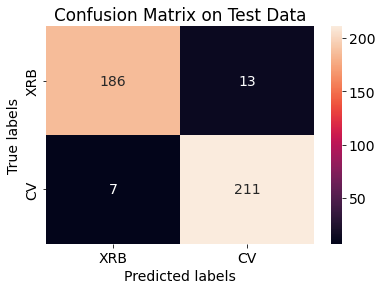

In [47]:
cf = conf_matrix(model_cnn , x_test , one_hot_y_test)

ax= plt.subplot()
sns.heatmap(cf, annot=True, fmt='g', ax=ax);  #annot=True to annotate cells, ftm='g' to disable scientific notation

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix on Test Data'); 
ax.xaxis.set_ticklabels(['XRB', 'CV']); ax.yaxis.set_ticklabels(['XRB', 'CV'])
plt.savefig('plots/cf_xrb_cv_test.jpg')

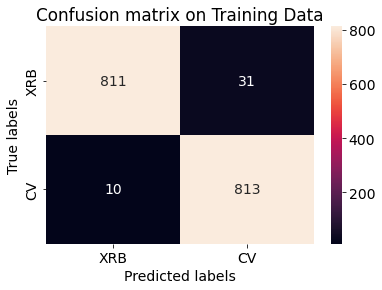

In [49]:
cf = conf_matrix(model_cnn , x_train , one_hot_y_train)

ax= plt.subplot()
sns.heatmap(cf, annot=True, fmt='g', ax=ax);  #annot=True to annotate cells, ftm='g' to disable scientific notation

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion matrix on Training Data'); 
ax.xaxis.set_ticklabels(['XRB', 'CV']); ax.yaxis.set_ticklabels(['XRB', 'CV'])
plt.savefig('plots/cf_xrb_cv_train.jpg')